In [1]:
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np

import pandas as pd

import sys
sys.path.append('..')

from bin.library_analyzer import Library, multi_gini, depth_plot,density_scatter,correspondance_plotter,line_plotter,OLS_plotter
from bin.utils import PlottingContext

In [2]:
lib = Library.load('../data/processed/allNOindel_1PBS_seq_MPRA.lib.pkl')

<Figure size 552x552 with 0 Axes>

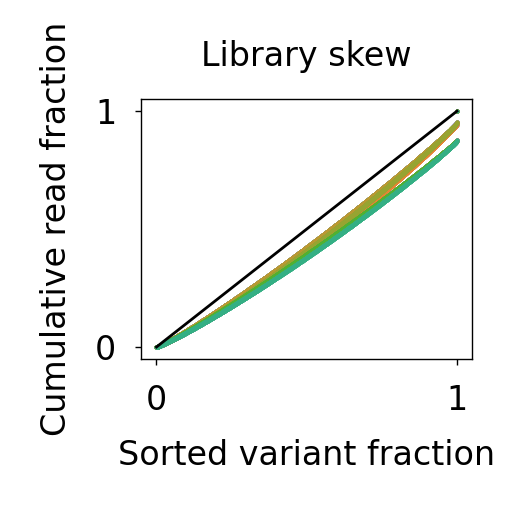

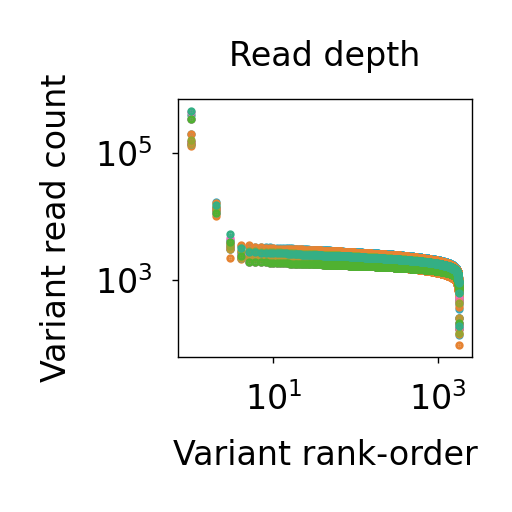

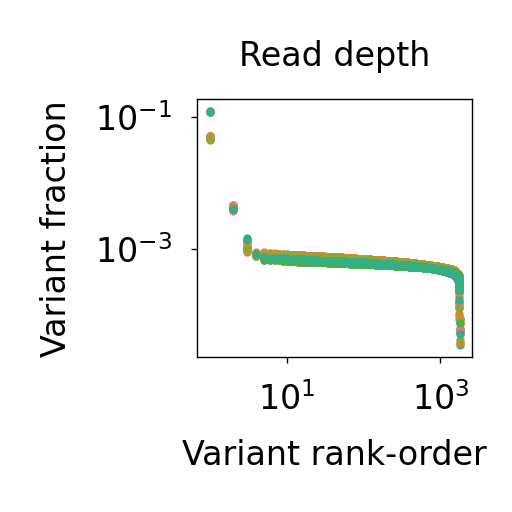

In [5]:
legend_scale = 5

rc_changes = {
   "figure.figsize" : (1.38,1.38),
}
custom_palette = sns.color_palette("husl", 12)


gini_fig = lib.check_skew(sns_settings={}, rc_settings=rc_changes, palette=custom_palette)
gini_h, gini_l = gini_fig.axes[0].get_legend_handles_labels()
gini_fig.axes[0].get_legend().remove()
plt.savefig('../figure_panels/supplemental/RNA_pool_libs_Gini.pdf',dpi=600)
plt.show()

fig_read, fig_frac = lib.check_depth(sns_settings={}, rc_settings=rc_changes, palette=custom_palette)

read_h, read_l = fig_read.axes[0].get_legend_handles_labels()
fig_read.axes[0].get_legend().remove()
fig_read.savefig('../figure_panels/supplemental/RNA_pool_libs_read_depth.pdf',dpi=600)

frac_h, frac_l = fig_frac.axes[0].get_legend_handles_labels()
fig_frac.axes[0].get_legend().remove()
fig_frac.savefig('../figure_panels/supplemental/RNA_pool_libs_fraction.pdf',dpi=600)
plt.show()

with PlottingContext(rc_settings=rc_changes, palette=custom_palette):
   gini_legend_fig = plt.figure()
   gini_legend_fig.legend(gini_h, gini_l,markerscale=legend_scale)
   plt.savefig('../figure_panels/supplemental/RNA_pool_libs_Gini_legend.pdf',dpi=600, bbox_inches='tight')
   plt.close()
   
   read_legend_fig = plt.figure()
   read_legend_fig.legend(read_h, read_l,markerscale=legend_scale)
   plt.savefig('../figure_panels/supplemental/RNA_pool_counts_zipf_legend.pdf',dpi=600, bbox_inches='tight')
   plt.close()

   frac_legend_fig = plt.figure()
   frac_legend_fig.legend(frac_h, frac_l,markerscale=legend_scale)
   plt.savefig('../figure_panels/supplemental/RNA_pool_fraction_zipf_legend.pdf',dpi=600, bbox_inches='tight')
   plt.close()



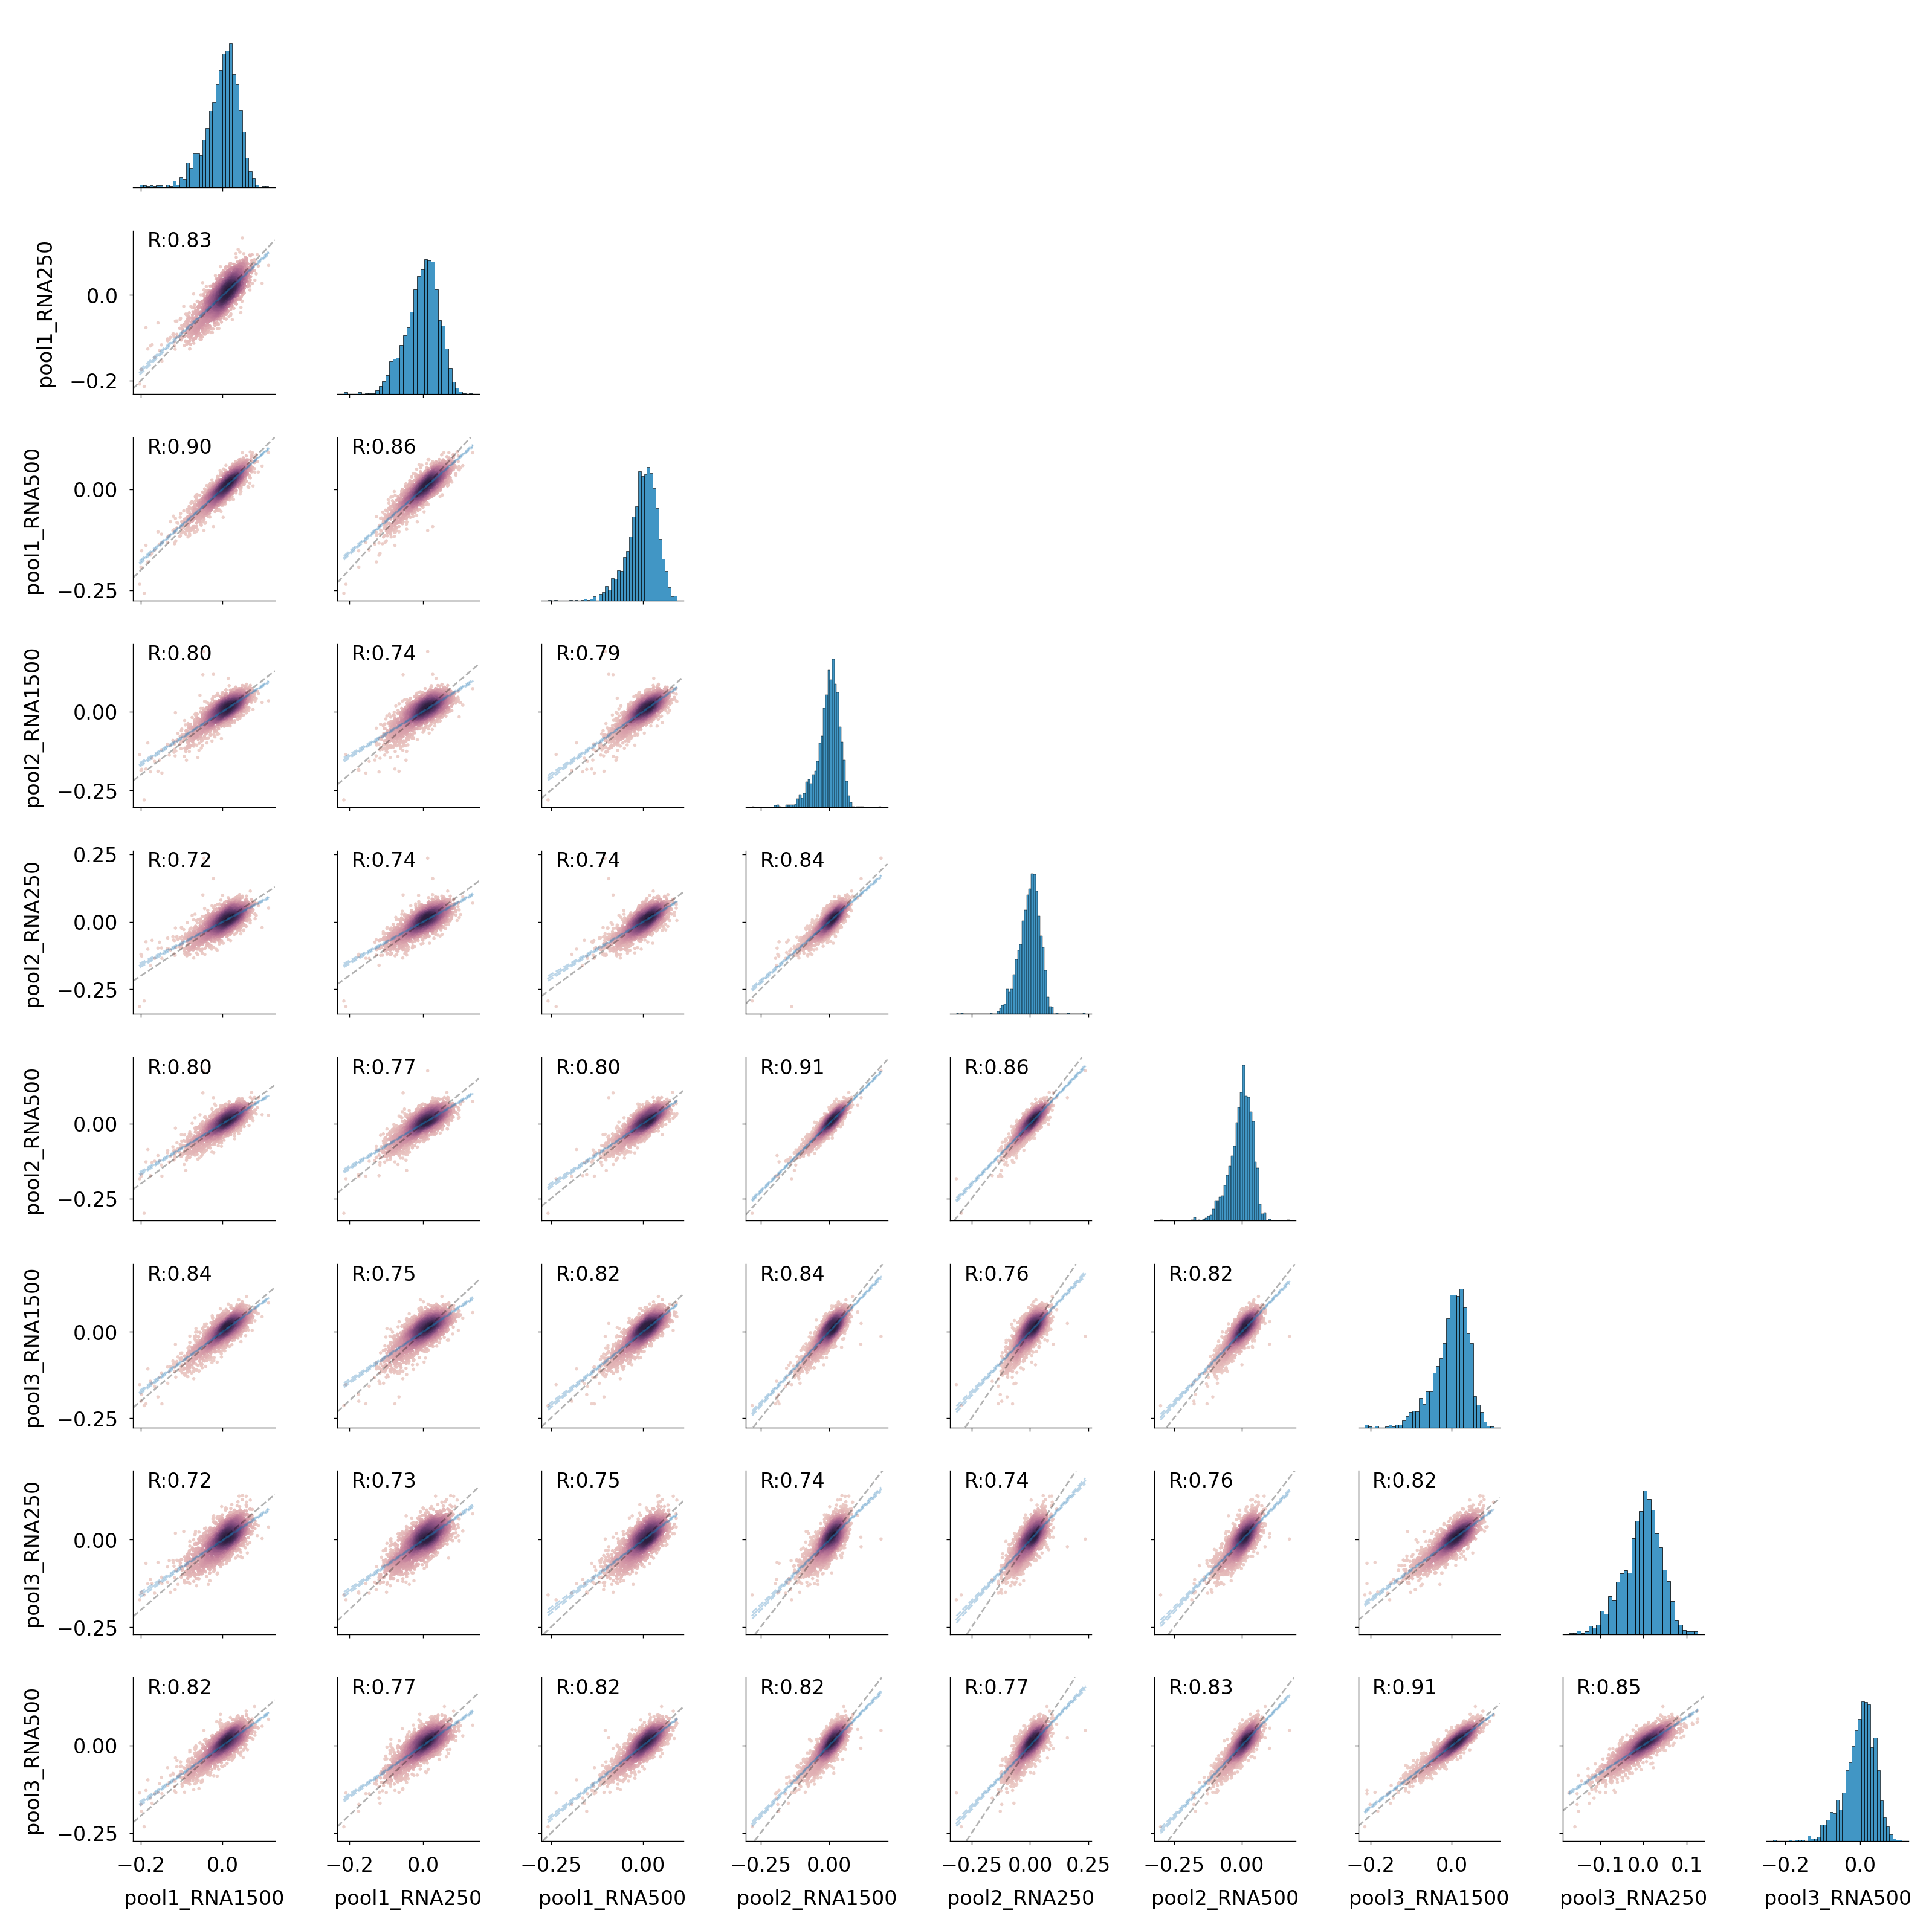

In [6]:
rc_changes = {
   "figure.figsize" : (3,3),}
replicate_checks = lib.make_replicate_checks(sns_settings={}, rc_settings=rc_changes, grid_kwargs=dict(height=0.9, aspect=1), palette='colorblind')
replicate_checks.savefig('../figure_panels/supplemental/replicate_checks.pdf', dpi=600)

plt.show()


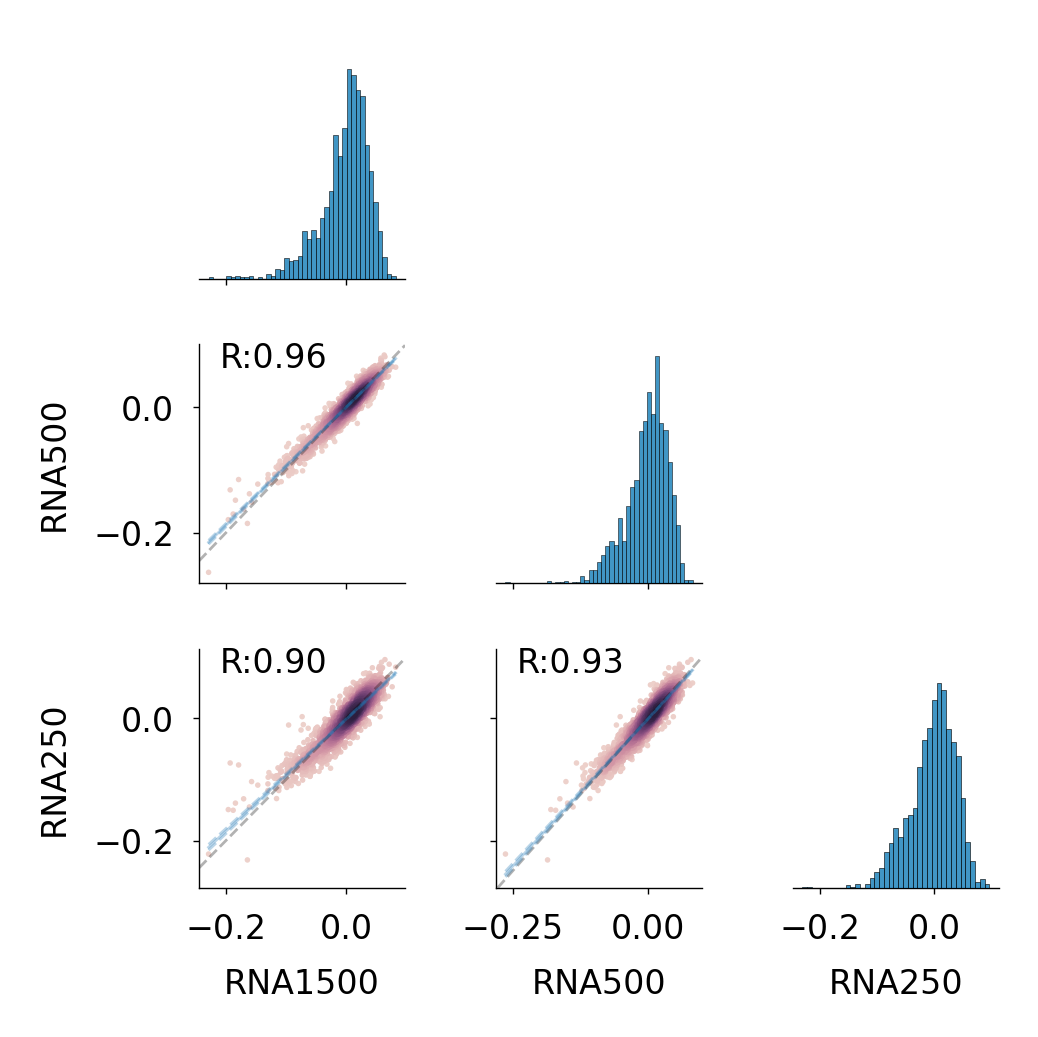

In [7]:
grouping_dict = {'RNA1500':['pool1_RNA1500','pool2_RNA1500','pool3_RNA1500'],
                 'RNA500':['pool1_RNA500','pool2_RNA500','pool3_RNA500'],
                 'RNA250':['pool1_RNA250','pool2_RNA250','pool3_RNA250'],}

rc_changes = {
   "figure.figsize" : (3,3),}

transfection_replicate_checks = lib.make_grouped_replicate_plots(grouping_dict=grouping_dict,sns_settings={}, rc_settings=rc_changes, 
                                                                 grid_kwargs=dict(height=0.9, aspect=1), palette='colorblind')
transfection_replicate_checks.savefig('../figure_panels/supplemental/transfection_replicate_checks.pdf', dpi=600)

plt.show()

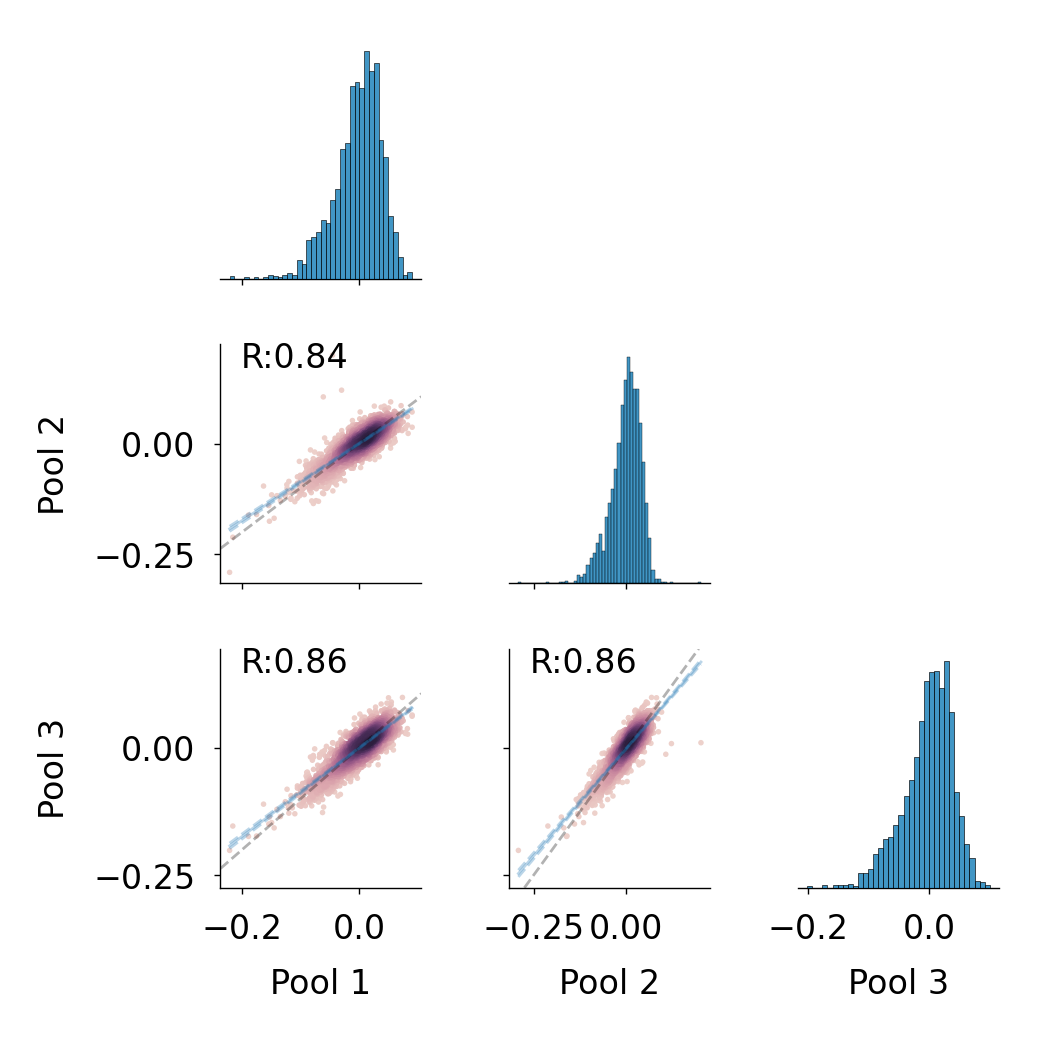

In [8]:
grouping_dict = {'Pool 1':['pool1_RNA1500','pool1_RNA500','pool1_RNA250'],
                 'Pool 2':['pool2_RNA1500','pool2_RNA500','pool2_RNA250'],
                 'Pool 3':['pool3_RNA1500','pool3_RNA500','pool3_RNA250'],}

rc_changes = {
   "figure.figsize" : (3,3),}

pool_checks = lib.make_grouped_replicate_plots(grouping_dict=grouping_dict,sns_settings={}, rc_settings=rc_changes, grid_kwargs=dict(height=0.9, aspect=1), palette='colorblind')
pool_checks.savefig('../figure_panels/supplemental/pool_checks.pdf', dpi=600)
plt.show()
